In [1]:
using CSV, Plots
theme(:dark)
iris = CSV.read("iris_data.csv");

In [2]:
data = [x for x in zip(iris[1:100, 1], iris[1:100, 2], iris[1:100, 5])];

In [3]:
using Random
shuff = copy(data)
shuff = shuff[shuffle(1:end), :]

100×1 Array{Tuple{Float64,Float64,String},2}:
 (6.7, 3.1, "versicolor")
 (5.5, 2.4, "versicolor")
 (6.0, 2.9, "versicolor")
 (4.8, 3.0, "setosa")    
 (5.7, 3.8, "setosa")    
 (6.1, 3.0, "versicolor")
 (6.3, 2.3, "versicolor")
 (5.4, 3.9, "setosa")    
 (5.1, 2.5, "versicolor")
 (4.9, 2.4, "versicolor")
 (5.5, 2.3, "versicolor")
 (4.6, 3.2, "setosa")    
 (5.4, 3.7, "setosa")    
 ⋮                       
 (5.9, 3.2, "versicolor")
 (6.4, 3.2, "versicolor")
 (5.0, 2.3, "versicolor")
 (5.6, 2.7, "versicolor")
 (6.7, 3.1, "versicolor")
 (5.7, 3.0, "versicolor")
 (5.0, 3.6, "setosa")    
 (5.1, 3.7, "setosa")    
 (4.8, 3.4, "setosa")    
 (6.3, 3.3, "versicolor")
 (4.6, 3.4, "setosa")    
 (6.9, 3.1, "versicolor")

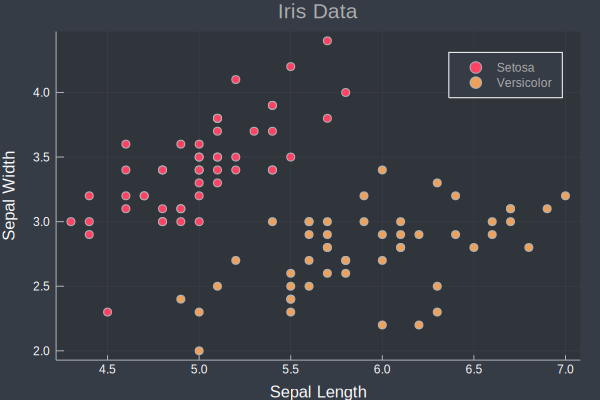

In [4]:
scatter([x[1:2] for x in shuff if x[3] == "setosa"], label = "Setosa")
scatter!([x[1:2] for x in shuff if x[3] == "versicolor"], label = "Versicolor")
plot!(title = "Iris Data", xlabel = "Sepal Length", ylabel = "Sepal Width")

In [5]:
X, Y = [[x[1], x[2]] for x in shuff], [x[3] == "setosa" ? 1 : -1 for x in shuff]

(Array{Float64,1}[[6.7, 3.1]; [5.5, 2.4]; … ; [4.6, 3.4]; [6.9, 3.1]], [-1; -1; … ; 1; -1])

In [6]:
X

100×1 Array{Array{Float64,1},2}:
 [6.7, 3.1]
 [5.5, 2.4]
 [6.0, 2.9]
 [4.8, 3.0]
 [5.7, 3.8]
 [6.1, 3.0]
 [6.3, 2.3]
 [5.4, 3.9]
 [5.1, 2.5]
 [4.9, 2.4]
 [5.5, 2.3]
 [4.6, 3.2]
 [5.4, 3.7]
 ⋮         
 [5.9, 3.2]
 [6.4, 3.2]
 [5.0, 2.3]
 [5.6, 2.7]
 [6.7, 3.1]
 [5.7, 3.0]
 [5.0, 3.6]
 [5.1, 3.7]
 [4.8, 3.4]
 [6.3, 3.3]
 [4.6, 3.4]
 [6.9, 3.1]

In [7]:
Y

100×1 Array{Int64,2}:
 -1
 -1
 -1
  1
  1
 -1
 -1
  1
 -1
 -1
 -1
  1
  1
  ⋮
 -1
 -1
 -1
 -1
 -1
 -1
  1
  1
  1
 -1
  1
 -1

In [8]:
function hypothesis(x, w)
    new_x = [1.0, x[1], x[2]]
    return w'*new_x > 0 ? 1 : -1
end

function classic_perceptron(x, y, w)

    if hypothesis(x, w) != y
            w += y*[1.0, x[1], x[2]]
    end
    return w
end     

classic_perceptron (generic function with 1 method)

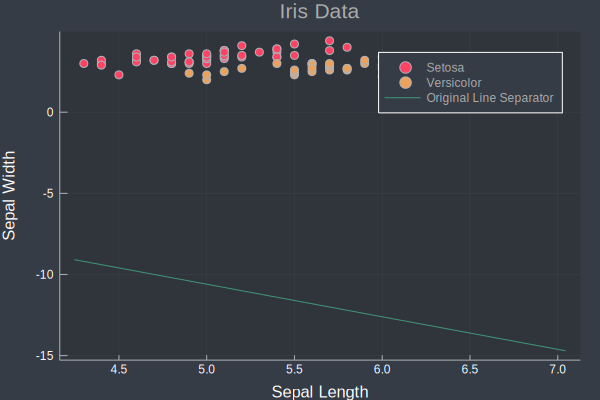

In [9]:
w = rand(3)
plot!(x -> (-w[1]-w[2]*x)/w[3], label = "Original Line Separator")

In [10]:
for _ in 1:1000
    for i in 1:100
        w = classic_perceptron(X[i], Y[i], w)
    end
end
w

3-element Array{Float64,1}:
  75.23857149738436 
 -43.5513708474671  
  52.722777099638016

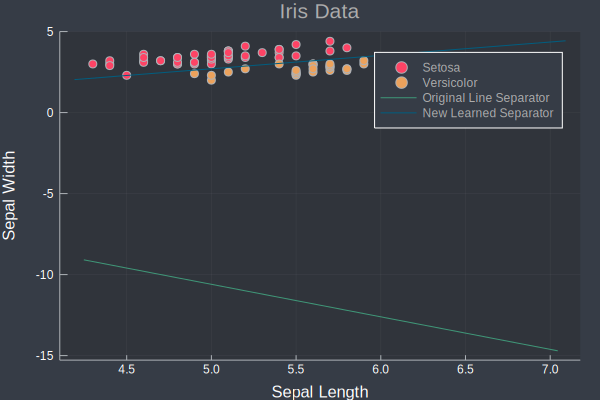

In [11]:
plot!(x -> (-w[1]-w[2]*x)/w[3], label= "New Learned Separator")

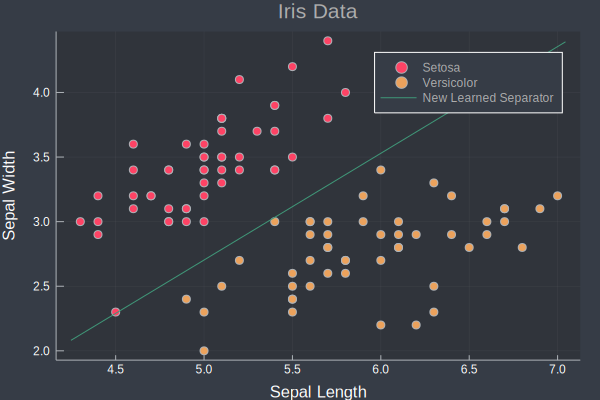

In [12]:
scatter([x[1:2] for x in shuff if x[3] == "setosa"], label = "Setosa")
scatter!([x[1:2] for x in shuff if x[3] == "versicolor"], label = "Versicolor")
plot!(title = "Iris Data", xlabel = "Sepal Length", ylabel = "Sepal Width")
plot!(x -> (-w[1]-w[2]*x)/w[3], label= "New Learned Separator")